# Project: Investigate a Dataset - Macroeconomical indicators analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

**Student:** Daniel Guarino

**Tools:** Python 3 

**Used Libraries:** Pandas, Numpy, Seaborn, Matplotlib 

> **Summary:**

> In this report economical data from Gapminder World will be analysed for South American countries. These datasets
> were downloaded from the link (https://www.gapminder.org/data/) in the section "data currently used list of indicators".
> The selected categories were all from the "Economic" branch:

> **--Economical Situation:** Inflation

> **--Incomes & Growth:** Total GDP PPP$ Inflaction Adjusted and Total Gini
>
>
> A brief conceptual explanation about each selected indicator is made following:

> **-GDP:** Gross domestic product (GDP) is a monetary measure of the market value of all the final goods and services produced in a specific time period, often annually. (Source: Wikipedia)

> **-Inflation:** Often expressed as a percentage, inflation indicates a decrease in the purchasing power of a nation's currency. (Source: Investopedia)

> **-GINI Index:** Is a measure of statistical dispersion intended to represent the income or wealth distribution of a nation's residents, and is the most commonly used measurement of inequality. (Source: Wikipedia)
>
> **Data pre-treatment:**
> Three excel spreadsheet files (xlsx) were downloaded from the website cited above. After that a filter was made in order to select just South American countries: Argentina, Bolivia, Brazil, Chile, Colombia, Ecuador, Paraguay, Peru, Uruguay and Venezuela (10 Countries in total).
> Then a csv file was generated from the excel spreadsheet in order allow these data to be analyzed on Python libraries.

> **An important observation is about Venezuelan data:** Their government didn't publish any economical indicator from 2015 to 2017, so these values were considered "Nan" in the original dataset for GDP and Inflation. To contour this I have selected these data from IMF (International Monetary Fund) (https://oglobo.globo.com/economia/economia-da-venezuela-deve-ter-queda-de-15-em-2018-com-inflacao-de-13000-diz-fmi-22328250) estimate and from an El País report in 29th, 2019. (https://brasil.elpais.com/brasil/2019/05/29/economia/1559099315_404810.html). This handmade data filling was made on Excel, so no missing data will be found in any dataset when analysed on Python.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
df_world = pd.read_csv('total_gdp_us_inflation_adjusted.csv', sep = ';')
df_south = pd.read_csv('south_america_gdp_us_inflation_adjusted.csv', sep = ';')
df_inflt = pd.read_csv('inflation_annual_percent.csv', sep = ';')
df_gini  = pd.read_csv('gini.csv', sep = ';')

In [3]:
# Just see each DataFrame
df_world.head(3)

,year,total_world_ gdp,total_samerica_gdp
0,1960,9.012424,0.58777
1,1961,9.409674,0.62991
2,1962,9.929296,0.65874


In [4]:
df_south.head(3)

,country,Argentina,Bolivia,Brazil,Chile,Colombia,Ecuador,Paraguay,Peru,Uruguay,Venezuela
0,1960,116000000000,4820000000,247000000000,29400000000,36500000000,10200000000,1950000000,27000000000,13900000000,101000000000
1,1961,122000000000,4920000000,273000000000,30900000000,38400000000,10400000000,2090000000,29000000000,14200000000,105000000000
2,1962,121000000000,5190000000,287000000000,32200000000,40500000000,10800000000,2150000000,31900000000,14000000000,114000000000


In [5]:
df_inflt.head(3)

,country,Argentina,Bolivia,Brazil,Chile,Colombia,Ecuador,Paraguay,Peru,Uruguay,Venezuela
0,1961,20.3,6.56,31.3,6.57,8.08,4.98,6.68,3.10,18.4,0.469
1,1962,28.9,3.57,78.8,12.90,6.58,2.15,8.42,3.01,12.0,1.940
2,1963,25.6,1.18,69.8,43.80,23.40,4.28,1.55,5.01,19.9,3.950


In [6]:
df_gini.head(3)

,country,Argentina,Bolivia,Brazil,Chile,Colombia,Ecuador,Paraguay,Peru,Uruguay,Venezuela
0,1960,41.4,45.1,44.3,68.0,62.3,41.9,40.8,57.1,47.0,63.1
1,1961,41.4,46.2,44.8,68.6,62.5,41.9,40.8,57.5,46.4,63.4
2,1962,41.5,47.1,45.2,68.2,62.3,41.9,40.8,57.4,45.9,63.7


> **Checking possible problems with data:**

> 1)number of samples 

> 2)the number of columns 

> 3)if we have missing data

> 4)duplicated data

> 5)if the type of each column data is correct for each DataFrame

In [7]:
# sum of World GDP x sum of South America GDP DataFrame:
# sample, number of columns, missing data and data type:
df_world.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 3 columns):
year                  58 non-null int64
total_world_ gdp      58 non-null float64
total_samerica_gdp    58 non-null float64
dtypes: float64(2), int64(1)
memory usage: 1.4 KB


 **World GDP dataset:**

 no missing data

 03 columnns 

 58 years of sample data

 data type is float for all columns which is suitable for the purpose of this dataset

In [8]:
# duplicated data:
sum(df_world.duplicated())

0

> no duplicated data in this dataset

In [9]:
# South America GDP DataFrame:
# sample, number of columns and data type:
df_south.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 11 columns):
country      58 non-null int64
Argentina    58 non-null int64
Bolivia      58 non-null int64
Brazil       58 non-null int64
Chile        58 non-null int64
Colombia     58 non-null int64
Ecuador      58 non-null int64
Paraguay     58 non-null int64
Peru         58 non-null int64
Uruguay      58 non-null int64
Venezuela    58 non-null int64
dtypes: int64(11)
memory usage: 5.1 KB


 **South America GDP:**

 no missing data

 11 columnns 

 58 years of sample data

 data type is integer for all columns which is suitable for the purpose of this dataset

In [10]:
# duplicated data:
sum(df_south.duplicated())

0

> no duplicated data in this dataset

In [11]:
# South America Inflation DataFrame:
# sample, number of columns and data type:
df_inflt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 11 columns):
country      57 non-null int64
Argentina    57 non-null float64
Bolivia      57 non-null float64
Brazil       57 non-null float64
Chile        57 non-null float64
Colombia     57 non-null float64
Ecuador      57 non-null float64
Paraguay     57 non-null float64
Peru         57 non-null float64
Uruguay      57 non-null float64
Venezuela    57 non-null float64
dtypes: float64(10), int64(1)
memory usage: 5.0 KB


 **Inflation dataset:**

 no missing data

 03 columnns 

 57 years of sample data (one less than World GDP and South America GDP )

 data type is float for all columns which is ok for this case

In [12]:
# duplicated data:
sum(df_inflt.duplicated())

0

> no duplicated data in this dataset

In [13]:
# South America GINI index DataFrame:
# sample, number of columns and data type:
df_gini.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 11 columns):
country      58 non-null int64
Argentina    58 non-null float64
Bolivia      58 non-null float64
Brazil       58 non-null float64
Chile        58 non-null float64
Colombia     58 non-null float64
Ecuador      58 non-null float64
Paraguay     58 non-null float64
Peru         58 non-null float64
Uruguay      58 non-null float64
Venezuela    58 non-null float64
dtypes: float64(10), int64(1)
memory usage: 5.1 KB


 **GINI Index dataset:**

 no missing data

 03 columnns 

 58 years of sample data

 data type is float for all columns which is ok for this case

In [14]:
# duplicated data:
sum(df_gini.duplicated()) 

0

> no duplicated data for this dataset

### Data Cleaning : ###
> **Data structure conclusions:**
    
> Inflation dataset has 57 sample while the others datasets have 58 samples

> drop the first row from the World GDP, South America GDP DataFrame is needed

> so we have all DataFrames with the same number of samples!

In [15]:
# the inflation data starts at 1961
df_inflt.head(1)

,country,Argentina,Bolivia,Brazil,Chile,Colombia,Ecuador,Paraguay,Peru,Uruguay,Venezuela
0,1961,20.3,6.56,31.3,6.57,8.08,4.98,6.68,3.1,18.4,0.469


In [16]:
# the others start at 1960
df_world.head(1)

,year,total_world_ gdp,total_samerica_gdp
0,1960,9.012424,0.58777


In [17]:
df_south.head(1)

,country,Argentina,Bolivia,Brazil,Chile,Colombia,Ecuador,Paraguay,Peru,Uruguay,Venezuela
0,1960,116000000000,4820000000,247000000000,29400000000,36500000000,10200000000,1950000000,27000000000,13900000000,101000000000


In [18]:
df_gini.head(1)

,country,Argentina,Bolivia,Brazil,Chile,Colombia,Ecuador,Paraguay,Peru,Uruguay,Venezuela
0,1960,41.4,45.1,44.3,68.0,62.3,41.9,40.8,57.1,47.0,63.1


* all the others datasets start at the year of 1960, so we need to drop the first row for the world GDP, South america and Gini index dataset in order to equalize the number of samples for the four datasets:

In [19]:
df_world.drop([0], axis = 0, inplace = True)
df_south.drop([0], axis = 0, inplace = True)
df_gini.drop([0], axis = 0, inplace = True)

In [20]:
# check
df_world.head(1)

,year,total_world_ gdp,total_samerica_gdp
1,1961,9.409674,0.62991


In [21]:
df_south.head(1)

,country,Argentina,Bolivia,Brazil,Chile,Colombia,Ecuador,Paraguay,Peru,Uruguay,Venezuela
1,1961,122000000000,4920000000,273000000000,30900000000,38400000000,10400000000,2090000000,29000000000,14200000000,105000000000


In [22]:
df_gini.head(1)

,country,Argentina,Bolivia,Brazil,Chile,Colombia,Ecuador,Paraguay,Peru,Uruguay,Venezuela
1,1961,41.4,46.2,44.8,68.6,62.5,41.9,40.8,57.5,46.4,63.4


In [23]:
df_inflt.head(1)

,country,Argentina,Bolivia,Brazil,Chile,Colombia,Ecuador,Paraguay,Peru,Uruguay,Venezuela
0,1961,20.3,6.56,31.3,6.57,8.08,4.98,6.68,3.1,18.4,0.469


** rename columns** using small letters and **add the code** gdp, inf and gin to each column to disguinsh data, also **change the column name** 'country' to year

In [24]:
cols_gdp   = ['year','arg_gdp', 'bol_gdp', 'bra_gdp', 'chi_gdp', 'col_gdp','ecu_gdp', 'par_gdp', 'per_gdp', 'uru_gdp', 'ven_gdp']
cols_inflt = ['year','arg_inf', 'bol_inf', 'bra_inf', 'chi_inf', 'col_inf','ecu_inf', 'par_inf', 'per_inf', 'uru_inf', 'ven_inf']
cols_gini  = ['year','arg_gin', 'bol_gin', 'bra_gin', 'chi_gin', 'col_gin','ecu_gin', 'par_gin', 'per_gin', 'uru_gin', 'ven_gin']
df_south.rename(columns=dict(zip(df_south.columns, cols_gdp)),inplace=True)
df_inflt.rename(columns=dict(zip(df_inflt.columns, cols_inflt)), inplace=True)
df_gini.rename(columns=dict(zip(df_gini.columns, cols_gini)), inplace=True)

** index problem!** after removing the first row on World GDP, South America GDP and Gini Index Datasets I choose set the column year as index from 1961 to 2017 at these three datasets:

In [25]:
df_world.set_index(['year'], inplace = True)
df_south.set_index(['year'], inplace = True)
df_inflt.set_index(['year'], inplace = True)
df_gini.set_index(['year'], inplace = True)

In [26]:
# check index correction
df_world.head(3)

,total_world_ gdp,total_samerica_gdp
year,,
1961,9.409674,0.62991
1962,9.929296,0.65874
1963,10.444524,0.66309


In [27]:
df_south.head(3)

,arg_gdp,bol_gdp,bra_gdp,chi_gdp,col_gdp,ecu_gdp,par_gdp,per_gdp,uru_gdp,ven_gdp
year,,,,,,,,,,
1961,122000000000,4920000000,273000000000,30900000000,38400000000,10400000000,2090000000,29000000000,14200000000,105000000000
1962,121000000000,5190000000,287000000000,32200000000,40500000000,10800000000,2150000000,31900000000,14000000000,114000000000
1963,114000000000,5530000000,289000000000,34000000000,41700000000,11300000000,2260000000,33300000000,14000000000,118000000000


In [28]:
df_gini.head(3)

,arg_gin,bol_gin,bra_gin,chi_gin,col_gin,ecu_gin,par_gin,per_gin,uru_gin,ven_gin
year,,,,,,,,,,
1961,41.4,46.2,44.8,68.6,62.5,41.9,40.8,57.5,46.4,63.4
1962,41.5,47.1,45.2,68.2,62.3,41.9,40.8,57.4,45.9,63.7
1963,40.7,48.0,45.7,66.8,61.6,41.9,40.8,57.0,45.3,64.2


In [29]:
df_inflt.head(3)

,arg_inf,bol_inf,bra_inf,chi_inf,col_inf,ecu_inf,par_inf,per_inf,uru_inf,ven_inf
year,,,,,,,,,,
1961,20.3,6.56,31.3,6.57,8.08,4.98,6.68,3.10,18.4,0.469
1962,28.9,3.57,78.8,12.90,6.58,2.15,8.42,3.01,12.0,1.940
1963,25.6,1.18,69.8,43.80,23.40,4.28,1.55,5.01,19.9,3.950


**check is all datasets have the same sample size**

In [30]:
assert df_inflt.shape[0] == df_world.shape[0] == df_south.shape[0] == df_gini.shape[0]

 **create a new column at World GDP Dataset in order to help future analysis **

In [31]:
df_world['south_share'] = round(df_world['total_samerica_gdp'] / df_world['total_world_ gdp']*100,2)
df_world.head(3)

,total_world_ gdp,total_samerica_gdp,south_share
year,,,
1961,9.409674,0.62991,6.69
1962,9.929296,0.65874,6.63
1963,10.444524,0.66309,6.35


In [32]:
# create a new column with changes in the world GDP, south america GDP and the share of south american GDP
df_world['world_gdp_changes'] = df_world['total_world_ gdp'].pct_change()
df_world['south_gdp_changes'] = df_world['total_samerica_gdp'].pct_change()
df_world['south_share_changes'] = df_world['south_share'].pct_change()

In [33]:
# transform the values into a percentage value multiplying to 100 and selecting two decimal places
df_world['world_gdp_changes'] = round(df_world['world_gdp_changes']*100,2)
df_world['south_gdp_changes'] = round(df_world['south_gdp_changes']*100,2)
df_world['south_share_changes'] = round(df_world['south_share_changes']*100,2)

In [34]:
# check changes
df_world.head(3)

,total_world_ gdp,total_samerica_gdp,south_share,world_gdp_changes,south_gdp_changes,south_share_changes
year,,,,,,
1961,9.409674,0.62991,6.69,NaN,NaN,NaN
1962,9.929296,0.65874,6.63,5.52,4.58,-0.90
1963,10.444524,0.66309,6.35,5.19,0.66,-4.22


## 1d Exploratory Data Analysis
### Research Question 1 - South American GDP Changes Trends and Statistics

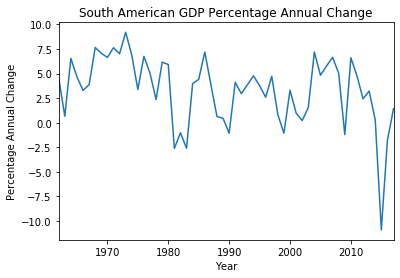

In [35]:
df_world['south_gdp_changes'][1:].plot()
plt.title('South American GDP Percentage Annual Change')
plt.xlabel('Year')
plt.ylabel('Percentage Annual Change');

In [36]:
df_world['south_gdp_changes'][1:].mean()

3.309821428571428

In [37]:
df_world['south_gdp_changes'][1:].std()

3.5098223166999776

*Conclusions:*
- generally south american GDP changes 3.30 % per annum
- the south american growth rate dropped from 2.5% per annum to -10 % after 2010

### Research Question 2 - Brazilian GDP Trends and Statistics

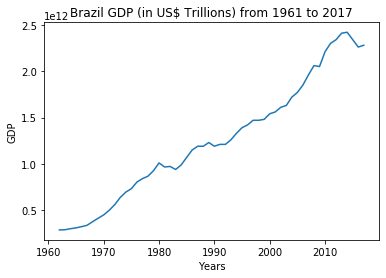

In [38]:
plt.plot(df_south['bra_gdp'][1:])
plt.title('Brazil GDP (in US$ Trillions) from 1961 to 2017')
plt.xlabel('Years')
plt.ylabel('GDP');

In [39]:
# dropped in the beggining of the 1980s and 2010s

In [40]:
# 1980s GDP annual change drop (from 1980 to 1983)
gdp_change_1980 = df_south['bra_gdp'].iloc[14:24].pct_change()*100

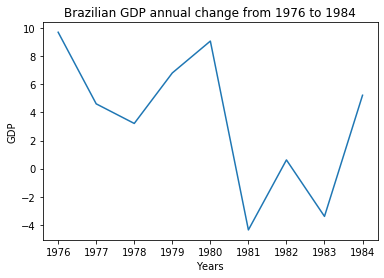

In [41]:
plt.plot(gdp_change_1980 )
plt.title('Brazilian GDP annual change from 1976 to 1984')
plt.xlabel('Years')
plt.ylabel('GDP');

In [42]:
# 2010s drop annual change (from 2010 to 2017)
gdp_change_2010 = df_south['bra_gdp'].iloc[-9:].pct_change()*100

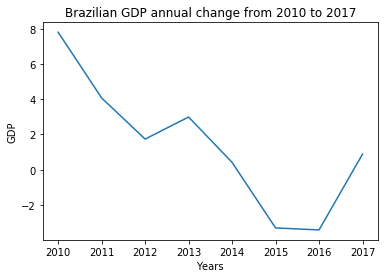

In [43]:
plt.plot(gdp_change_2010)
plt.title('Brazilian GDP annual change from 2010 to 2017')
plt.xlabel('Years')
plt.ylabel('GDP');

*Conclusions:*
- Brazilian GDP is an ascending trend since 1961
- But we can identify two recessions periods, one from 1980 to 1983 and another recently from 2010 to 2016 

### Research Question 3 - Brazilian GINI Trends and Statistics

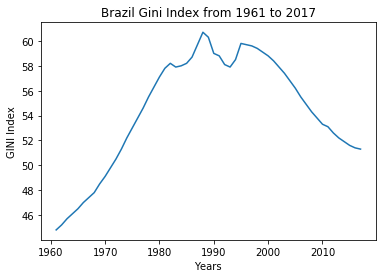

In [44]:
plt.plot(df_gini['bra_gin'])
plt.title('Brazil Gini Index from 1961 to 2017')
plt.xlabel('Years')
plt.ylabel('GINI Index');

*Conclusions:*
- Brazilian Gini Index reached a peak just before the 1990s and started to drop in the first half of the 1990s decade
- The trend shows the country is becoming less unequal since then.

<a id='eda'></a>
## 2d Exploratory Data Analysis


### GDP 
### Research Question 1 - What's the evolucion of South American GDP from 1961 to 2017?

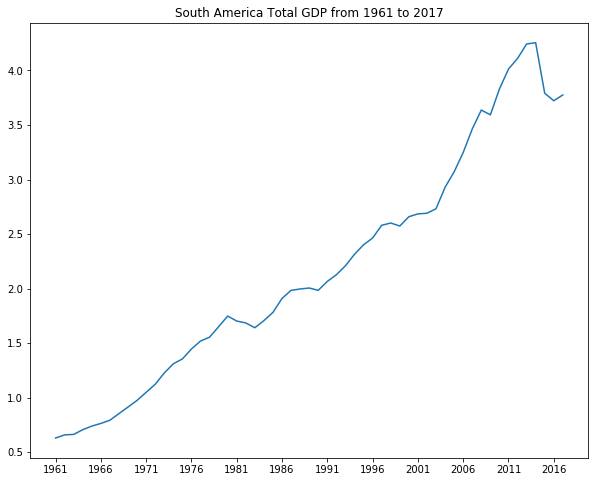

In [45]:
plt.figure(figsize= (10,8))
plt.plot(np.arange(1961,2018) ,df_world['total_samerica_gdp']);
plt.title('South America Total GDP from 1961 to 2017');
plt.xticks(np.arange(1961, 2018, step=5));

### GDP
### Research Question 2  - Which are the top 05 biggest economy in Southe America in 2007 and 2017? Did it have any change in this top 05 in these 10 years?

In [46]:
df_south.iloc[46].sort_values(ascending=False).head(5)

bra_gdp    1960000000000
arg_gdp     393000000000
ven_gdp     392000000000
col_gdp     262000000000
chi_gdp     203000000000
Name: 2007, dtype: int64

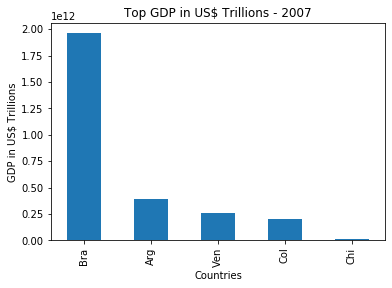

In [47]:
gdp_2007 = df_south.iloc[46, np.r_[0:5]]
gdp_2007 = gdp_2007.sort_values(ascending = False)
gdp_2007.plot(kind='bar')
plt.title('Top GDP in US$ Trillions - 2007')
plt.xticks(np.arange(5), ['Bra', 'Arg', 'Ven', 'Col', 'Chi'])
plt.xlabel('Countries')
plt.ylabel('GDP in US$ Trillions');
# fix the chart using plt.bar!

In [48]:
df_south.iloc[56].sort_values(ascending=False).head(5)

bra_gdp    2280000000000
arg_gdp     460000000000
col_gdp     373000000000
ven_gdp     290518560640
chi_gdp     272000000000
Name: 2017, dtype: int64

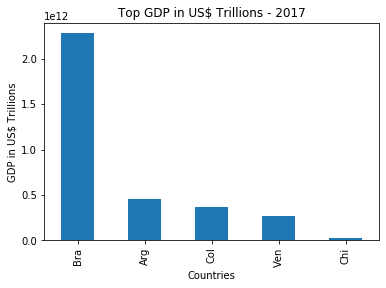

In [49]:
gdp_2017 = df_south.iloc[56, np.r_[0:5]]
gdp_2017 = gdp_2017.sort_values(ascending = False)
gdp_2017.plot(kind='bar')
plt.title('Top GDP in US$ Trillions - 2017')
plt.xticks(np.arange(5), ['Bra', 'Arg', 'Col', 'Ven', 'Chi'])
plt.xlabel('Countries')
plt.ylabel('GDP in US$ Trillions');

** Conclusion: ** 
- Brazil kept as the biggest South American enonomy in 2007 and 2017
- in 2007 Venezuela was the third biggest economy. In 2017 Colombia took Venelueza's third place
- Chile kept as the fith biggest economy in the continent.

### GDP
### Research Question 3  - Which south american country's GDP has grown since 1961?

In [50]:
for i in df_south.columns:
    df_south[i + '_change'] = df_south[i].pct_change()

In [51]:
df_south.iloc[:, np.r_[10:20]].mean().sort_values(ascending = False) *100

par_gdp_change    4.723029
col_gdp_change    4.165726
chi_gdp_change    4.067758
bra_gdp_change    3.942079
ecu_gdp_change    3.924067
per_gdp_change    3.612892
bol_gdp_change    3.206028
arg_gdp_change    2.557516
uru_gdp_change    2.348317
ven_gdp_change    2.021726
dtype: float64

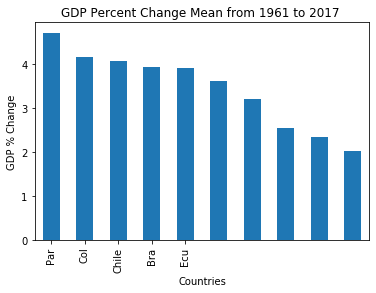

In [52]:
gdp_pct = df_south.iloc[:, np.r_[10:20]].mean().sort_values(ascending = False) *100
gdp_pct.plot(kind='bar')
plt.title('GDP Percent Change Mean from 1961 to 2017 ')
plt.xticks(np.arange(5), ['Par', 'Col', 'Chile', 'Bra', 'Ecu', 'Per', 'Bol', 'Arg', 'Uru', 'Ven'])
plt.xlabel('Countries')
plt.ylabel('GDP % Change');

### GDP
### Research Question 4  - in which country the GDP change has oscilated more since 1961? 

In [53]:
gdp_std = df_south.iloc[:, np.r_[10:20]].std().sort_values(ascending = False) *100

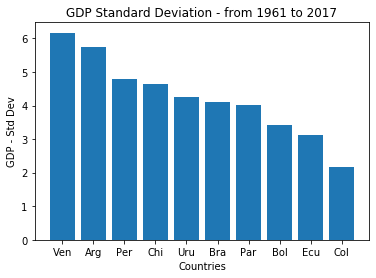

In [54]:
label = ['Ven', 'Arg', 'Per', 'Chi', 'Uru', 'Bra', 'Par', 'Bol', 'Ecu', 'Col']

plt.bar(np.arange(10), gdp_std)
plt.xticks(np.arange(10),label)
plt.xlabel('Countries')
plt.ylabel('GDP - Std Dev')
plt.title('GDP Standard Deviation - from 1961 to 2017');

* Venezuela has the greatest GDP Standard Deviation from 1961 to 2017

### Inflation Rate
### Research Question 5  -  What was the country whith highest average inflation rate for each south american country since 1961?

No handles with labels found to put in legend.


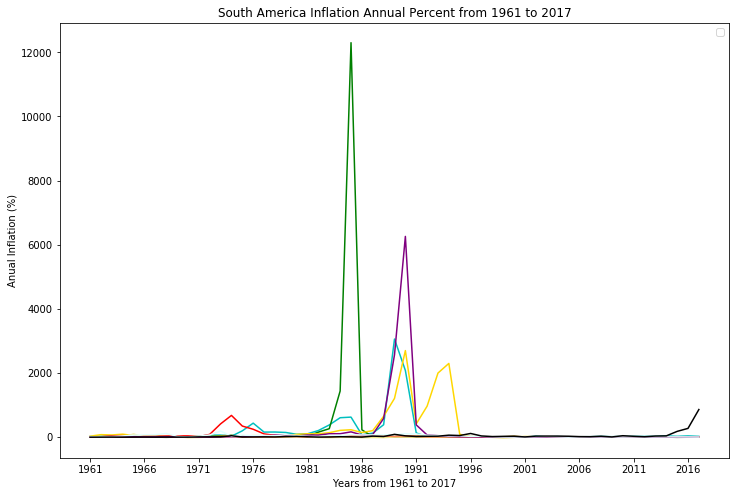

In [55]:
plt.figure(figsize=(12,8))
plt.plot(np.arange(1961,2018), df_inflt['arg_inf'], color = 'c')
plt.plot(np.arange(1961,2018), df_inflt['bol_inf'], color = 'g')
plt.plot(np.arange(1961,2018), df_inflt['bra_inf'], color = 'gold')
plt.plot(np.arange(1961,2018), df_inflt['chi_inf'], color = 'r')
plt.plot(np.arange(1961,2018), df_inflt['col_inf'], color = 'darkgoldenrod')
plt.plot(np.arange(1961,2018), df_inflt['ecu_inf'], color = 'khaki')
plt.plot(np.arange(1961,2018), df_inflt['par_inf'], color = 'coral')
plt.plot(np.arange(1961,2018), df_inflt['per_inf'], color = 'purple')
plt.plot(np.arange(1961,2018), df_inflt['uru_inf'], color = 'lightcyan')
plt.plot(np.arange(1961,2018), df_inflt['ven_inf'], color = 'black')
plt.xticks(np.arange(1961, 2018, step=5));
plt.title('South America Inflation Annual Percent from 1961 to 2017')
plt.xlabel('Years from 1961 to 2017')
plt.ylabel('Anual Inflation (%)')
plt.legend();

In [56]:
infl_mean = df_inflt.iloc[:, np.r_[0:10]].mean().sort_values(ascending = False)
infl_mean

bol_inf    261.598772
bra_inf    219.782105
per_inf    194.781298
arg_inf    171.110414
chi_inf     47.927309
ven_inf     44.278596
uru_inf     39.518912
col_inf     15.706140
par_inf     11.348742
ecu_inf      5.838649
dtype: float64

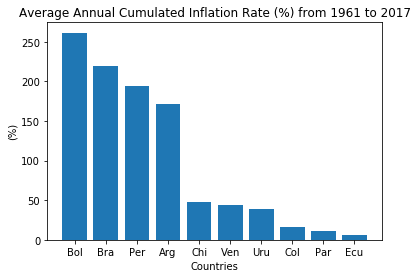

In [57]:
label = ['Bol', 'Bra', 'Per', 'Arg', 'Chi', 'Ven', 'Uru', 'Col', 'Par', 'Ecu']

plt.bar(np.arange(10), infl_mean)
plt.xticks(np.arange(10),label)
plt.xlabel('Countries')
plt.ylabel('(%)')
plt.title('Average Annual Cumulated Inflation Rate (%) from 1961 to 2017');

* Bolivia achieved more than 12,000 % of annual inflation rate in the first half of the 1980s

* Peru achieved more than 6,000 % of annual inflation rate in the second half of the 1980s

* Argentina and Brazil achieved more than 2,000 % of annual inflation rate in the end of the 1980s

* Brazil achieved another peak of more than 2,000 % of annual inflation rate in 1994

* More recently Venezuela's inflation annual percent rate has been increasing to almost 1,000 % annual inflation rate

### Inflation Rate
### Research Question 6  - What was the country whith highest oscilating inflation rate for each south american country since 1961?

In [58]:
infl_std = df_inflt.iloc[:, np.r_[0:10]].std().sort_values(ascending = False)
infl_std

bol_inf    1634.572959
per_inf     888.569713
bra_inf     552.340554
arg_inf     491.146314
ven_inf     119.032867
chi_inf     113.971272
uru_inf      36.721643
ecu_inf      16.844081
col_inf       9.868671
par_inf       9.373088
dtype: float64

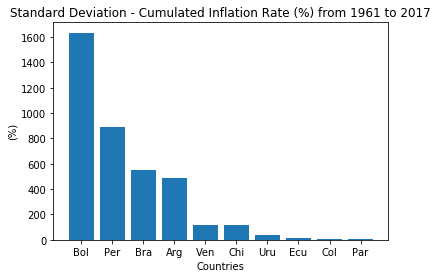

In [59]:
label_01 = ['Bol', 'Per', 'Bra', 'Arg', 'Ven', 'Chi', 'Uru', 'Ecu', 'Col', 'Par']

plt.bar(np.arange(10), infl_std)
plt.xticks(np.arange(10),label_01)
plt.xlabel('Countries')
plt.ylabel('(%)')
plt.title('Standard Deviation - Cumulated Inflation Rate (%) from 1961 to 2017');

### GINI Index
### Research Question 7  -  Which are the three countries that has most improved in reducing inequality when comparing 2017 and 1961?

In [60]:
for i in df_gini.columns:
    ratio = df_gini.iloc[56] / df_gini.iloc[0]
print(ratio.sort_values().head(3))

chi_gin    0.695335
ven_gin    0.739748
per_gin    0.760000
dtype: float64


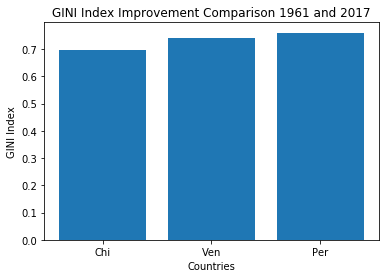

In [61]:
label_02 = ['Chi', 'Ven', 'Per']

plt.bar(np.arange(3), ratio.sort_values().head(3))
plt.xticks(np.arange(3),label_02)
plt.xlabel('Countries')
plt.ylabel('GINI Index')
plt.title('GINI Index Improvement Comparison 1961 and 2017');
# less is better!

** Top 3 wealthy unequality improvement (less is better) **
 
1)Chile

2)Venezuela
 
3)Peru

### GINI Index
### Research Question 8  - Which are the three countries that has most worsened in reducing inequality when comparing 2017 and 1961?

In [62]:
for i in df_gini.columns:
    ratio = df_gini.iloc[56] / df_gini.iloc[0]
print(ratio.sort_values(ascending = False).head(3))

par_gin    1.171569
bra_gin    1.145089
ecu_gin    1.078759
dtype: float64


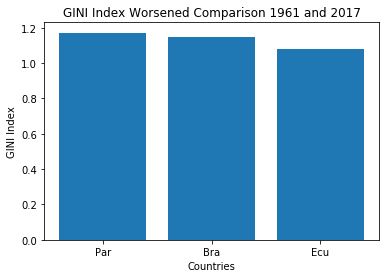

In [63]:
label_03 = ['Par', 'Bra', 'Ecu']

plt.bar(np.arange(3), ratio.sort_values(ascending = False).head(3))
plt.xticks(np.arange(3),label_03)
plt.xlabel('Countries')
plt.ylabel('GINI Index')
plt.title('GINI Index Worsened Comparison 1961 and 2017');
# more is worse!

** Top 3 wealthy unequality worsen (more is worse) **
 
1)Chile

2)Venezuela
 
3)Peru

<a id='conclusions'></a>
## Conclusions

> The obtained results shows important economical indicators trought the years, but we can't say the causes of South America economical growth, wealthy inequality nor inflation rate at all;

> It's pointless try to correlate any of our selected indicators, since each one is calculated in completely different ways as we can see at data brief above in this work;

> Brazil has the biggest South American economy in the given period, but had tough Inflation periods until 1994. 

> Paraguay is the most unequal country. In the other hand the country had a small Inflation oscilation in the given period.

> Venezuela has the greatest GDP oscilacion in the given period.



In [75]:
df = pd.concat([df_south, df_inflt, df_gini], axis = 1 )

In [76]:
df.head()

,arg_gdp,bol_gdp,bra_gdp,chi_gdp,col_gdp,ecu_gdp,par_gdp,per_gdp,uru_gdp,ven_gdp,...,arg_gin,bol_gin,bra_gin,chi_gin,col_gin,ecu_gin,par_gin,per_gin,uru_gin,ven_gin
year,,,,,,,,,,,,,,,,,,,,,
1961,122000000000,4920000000,273000000000,30900000000,38400000000,10400000000,2090000000,29000000000,14200000000,105000000000,...,41.4,46.2,44.8,68.6,62.5,41.9,40.8,57.5,46.4,63.4
1962,121000000000,5190000000,287000000000,32200000000,40500000000,10800000000,2150000000,31900000000,14000000000,114000000000,...,41.5,47.1,45.2,68.2,62.3,41.9,40.8,57.4,45.9,63.7
1963,114000000000,5530000000,289000000000,34000000000,41700000000,11300000000,2260000000,33300000000,14000000000,118000000000,...,40.7,48.0,45.7,66.8,61.6,41.9,40.8,57.0,45.3,64.2
1964,126000000000,5790000000,300000000000,34900000000,44400000000,12100000000,2350000000,35500000000,14400000000,131000000000,...,40.0,48.7,46.1,64.4,60.3,41.9,40.8,56.2,44.8,64.8
1965,139000000000,6120000000,309000000000,35200000000,45800000000,12700000000,2500000000,37500000000,14500000000,137000000000,...,39.4,49.5,46.5,62.0,59.0,41.9,40.8,55.3,44.2,65.3


In [73]:
df_south.shape[0] == df_inflt.shape[0] == df_gini.shape[0]

True

In [106]:
lst = list(df.columns)
lst

['arg_gdp',
 'bol_gdp',
 'bra_gdp',
 'chi_gdp',
 'col_gdp',
 'ecu_gdp',
 'par_gdp',
 'per_gdp',
 'uru_gdp',
 'ven_gdp',
 'arg_gdp_change',
 'bol_gdp_change',
 'bra_gdp_change',
 'chi_gdp_change',
 'col_gdp_change',
 'ecu_gdp_change',
 'par_gdp_change',
 'per_gdp_change',
 'uru_gdp_change',
 'ven_gdp_change',
 'arg_inf',
 'bol_inf',
 'bra_inf',
 'chi_inf',
 'col_inf',
 'ecu_inf',
 'par_inf',
 'per_inf',
 'uru_inf',
 'ven_inf',
 'arg_gin',
 'bol_gin',
 'bra_gin',
 'chi_gin',
 'col_gin',
 'ecu_gin',
 'par_gin',
 'per_gin',
 'uru_gin',
 'ven_gin']

In [108]:
def colorg(lst):
    l = []
    country = []
    for i in lst:
        f = i.split('_')[0]
        if f not in country:
            gdp = f + '_gdp'
            gdpc = f + '_gdp_change'
            inf = f + '_inf'
            gin = f + '_gin'
            country.append(f)
            l.append(gdp)
            l.append(gdpc)
            l.append(inf)
            l.append(gin)  
            
       
    return l
        
        

In [85]:
lst[39].split('_')[0]


'ven'

In [110]:
len(colorg(lst))

40

In [109]:
colorg(lst)

['arg_gdp',
 'arg_gdp_change',
 'arg_inf',
 'arg_gin',
 'bol_gdp',
 'bol_gdp_change',
 'bol_inf',
 'bol_gin',
 'bra_gdp',
 'bra_gdp_change',
 'bra_inf',
 'bra_gin',
 'chi_gdp',
 'chi_gdp_change',
 'chi_inf',
 'chi_gin',
 'col_gdp',
 'col_gdp_change',
 'col_inf',
 'col_gin',
 'ecu_gdp',
 'ecu_gdp_change',
 'ecu_inf',
 'ecu_gin',
 'par_gdp',
 'par_gdp_change',
 'par_inf',
 'par_gin',
 'per_gdp',
 'per_gdp_change',
 'per_inf',
 'per_gin',
 'uru_gdp',
 'uru_gdp_change',
 'uru_inf',
 'uru_gin',
 'ven_gdp',
 'ven_gdp_change',
 'ven_inf',
 'ven_gin']

In [111]:
df_new = df[colorg(lst)] 

In [112]:
df_new.head()

,arg_gdp,arg_gdp_change,arg_inf,arg_gin,bol_gdp,bol_gdp_change,bol_inf,bol_gin,bra_gdp,bra_gdp_change,...,per_inf,per_gin,uru_gdp,uru_gdp_change,uru_inf,uru_gin,ven_gdp,ven_gdp_change,ven_inf,ven_gin
year,,,,,,,,,,,,,,,,,,,,,
1961,122000000000,NaN,20.3,41.4,4920000000,NaN,6.56,46.2,273000000000,NaN,...,3.10,57.5,14200000000,NaN,18.4,46.4,105000000000,NaN,0.469,63.4
1962,121000000000,-0.008197,28.9,41.5,5190000000,0.054878,3.57,47.1,287000000000,0.051282,...,3.01,57.4,14000000000,-0.014085,12.0,45.9,114000000000,0.085714,1.940,63.7
1963,114000000000,-0.057851,25.6,40.7,5530000000,0.065511,1.18,48.0,289000000000,0.006969,...,5.01,57.0,14000000000,0.000000,19.9,45.3,118000000000,0.035088,3.950,64.2
1964,126000000000,0.105263,28.8,40.0,5790000000,0.047016,7.52,48.7,300000000000,0.038062,...,13.60,56.2,14400000000,0.028571,40.4,44.8,131000000000,0.110169,0.993,64.8
1965,139000000000,0.103175,21.2,39.4,6120000000,0.056995,5.02,49.5,309000000000,0.030000,...,12.30,55.3,14500000000,0.006944,62.2,44.2,137000000000,0.045802,2.340,65.3


In [113]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 1961 to 2017
Data columns (total 40 columns):
arg_gdp           57 non-null int64
arg_gdp_change    56 non-null float64
arg_inf           57 non-null float64
arg_gin           57 non-null float64
bol_gdp           57 non-null int64
bol_gdp_change    56 non-null float64
bol_inf           57 non-null float64
bol_gin           57 non-null float64
bra_gdp           57 non-null int64
bra_gdp_change    56 non-null float64
bra_inf           57 non-null float64
bra_gin           57 non-null float64
chi_gdp           57 non-null int64
chi_gdp_change    56 non-null float64
chi_inf           57 non-null float64
chi_gin           57 non-null float64
col_gdp           57 non-null int64
col_gdp_change    56 non-null float64
col_inf           57 non-null float64
col_gin           57 non-null float64
ecu_gdp           57 non-null int64
ecu_gdp_change    56 non-null float64
ecu_inf           57 non-null float64
ecu_gin           57 non-null 